In [121]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [116]:
# 240913 filepath
ch0_fp = "240913_newscan/240913_new_scan_25downsampled_ch0.nii.gz"
ch1_fp = "240913_newscan/240913_new_scan_25downsampled_ch1.nii.gz"
ch2_fp = "240913_newscan/240913_new_scan_25downsampled_ch2.nii.gz"
# SmartSPIM template filepath
smartspim_fp = "processed/smartspim_25um_cropped.nii"

# Load in the files
ch0 = nib.load(ch0_fp).get_fdata()
ch1 = nib.load(ch1_fp).get_fdata()
ch2 = nib.load(ch2_fp).get_fdata()
smartspim = nib.load(smartspim_fp).get_fdata()

# Flip orientation to match SmartSPIM
ch0 = np.rot90(ch0, k=1, axes=(1, 2))  # Ch0
ch0 = np.flip(ch0, axis=0)
ch1 = np.rot90(ch1, k=1, axes=(1, 2))  # Ch1
ch1 = np.flip(ch1, axis=0)
ch2 = np.rot90(ch2, k=1, axes=(1, 2))  # Ch2
ch2 = np.flip(ch2, axis=0)

# Move SmartSPIM indexing axes
smartspim = np.moveaxis(smartspim, -1, 0)

# Print information
print("Ch0 shape:", ch0.shape)
print("SmartSPIM shape:", smartspim.shape)

curr_ch = ch0

Ch0 shape: (105, 570, 490)
SmartSPIM shape: (323, 648, 576)


## Preview single slices

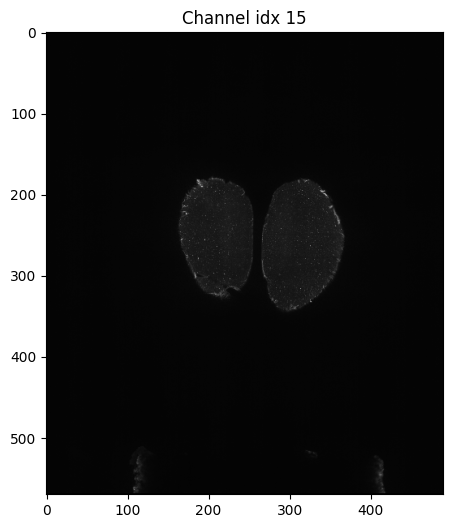

In [117]:
ch_idx = 15

plt.figure(figsize=(6, 6))
plt.title(f"Channel idx {ch_idx}")
plt.imshow(curr_ch[ch_idx], cmap='gray')
plt.show()

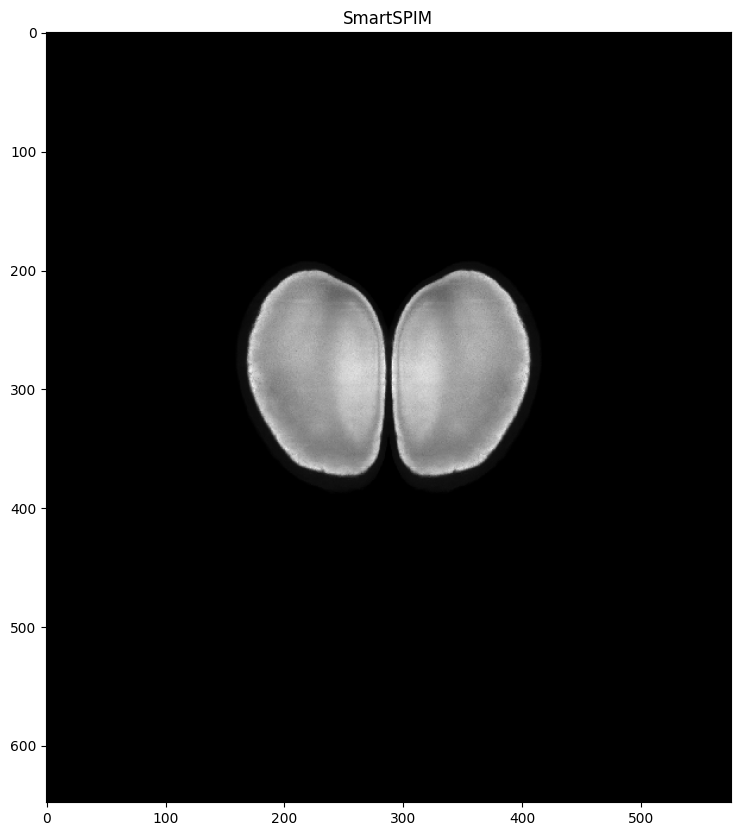

In [118]:
# Show SmartSPIM template
smartspim_idx = 20

plt.figure(figsize=(10, 10))
plt.title("SmartSPIM")
plt.imshow(smartspim[smartspim_idx, :, :], cmap='gray')
plt.show()

## Show example set iteration

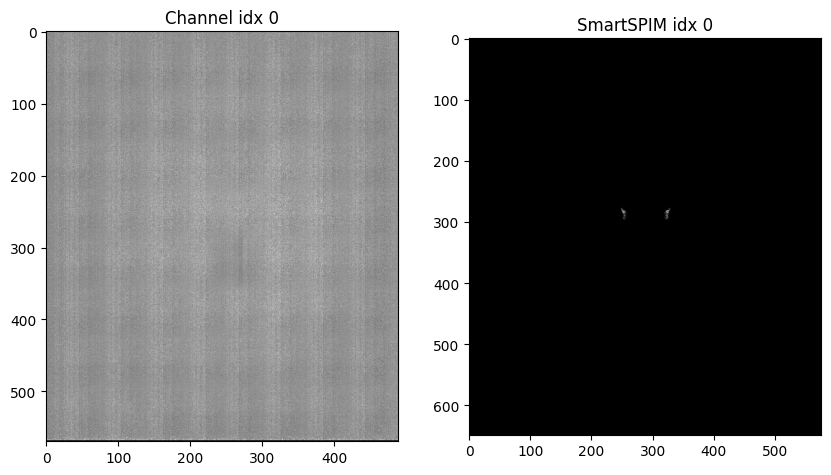

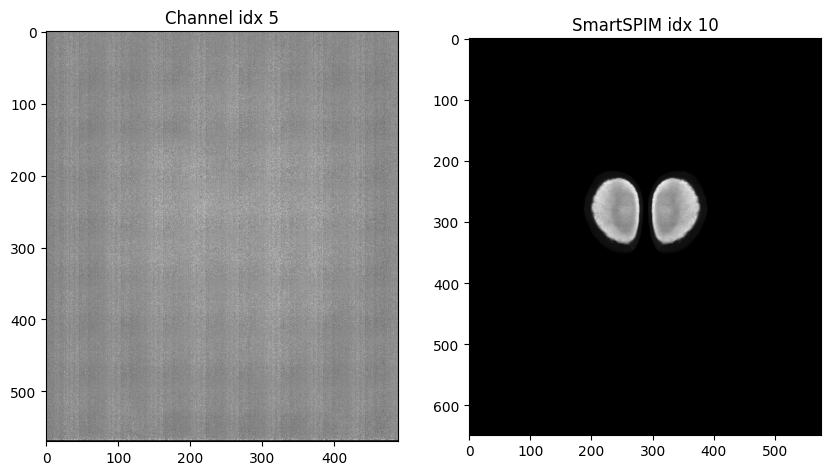

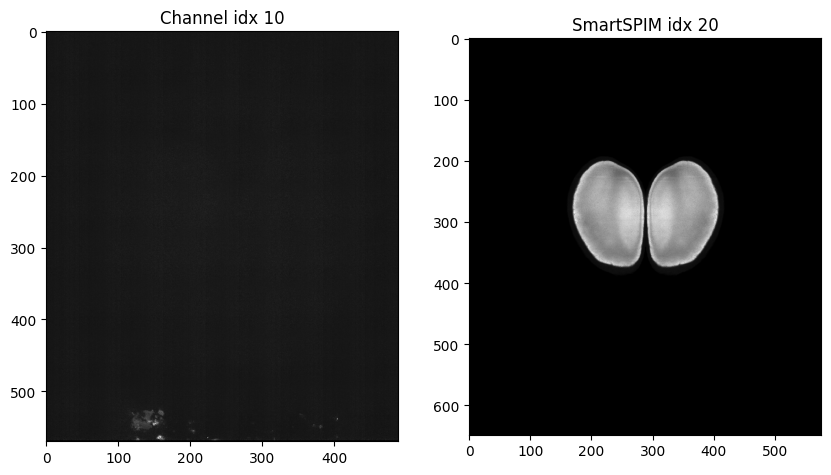

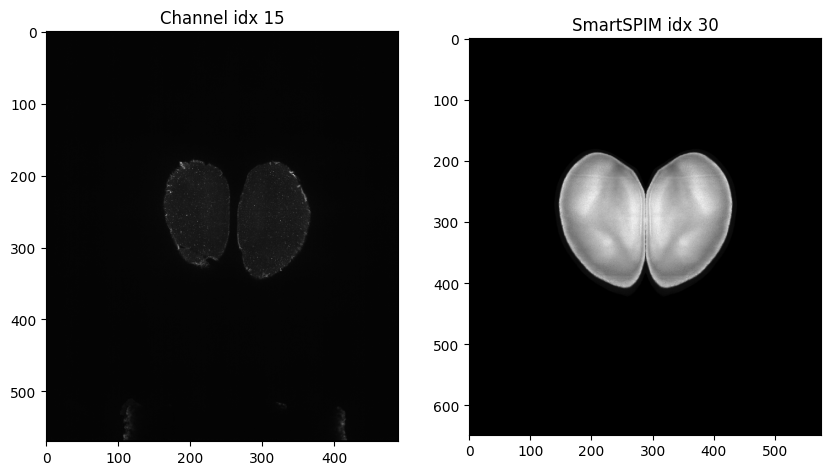

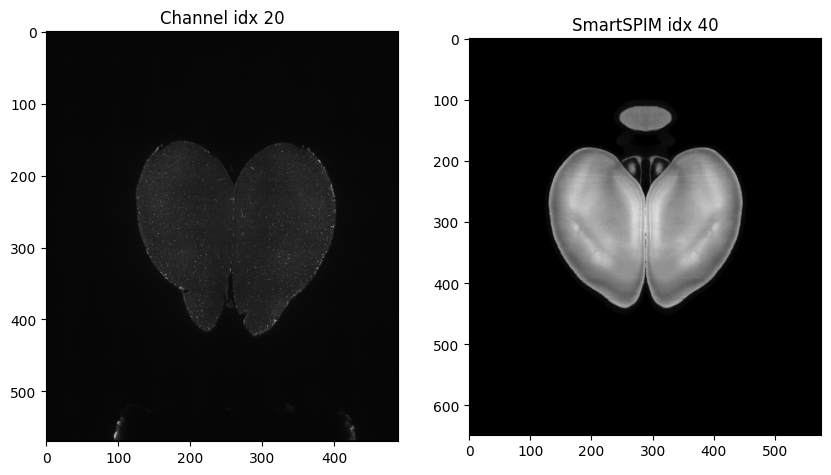

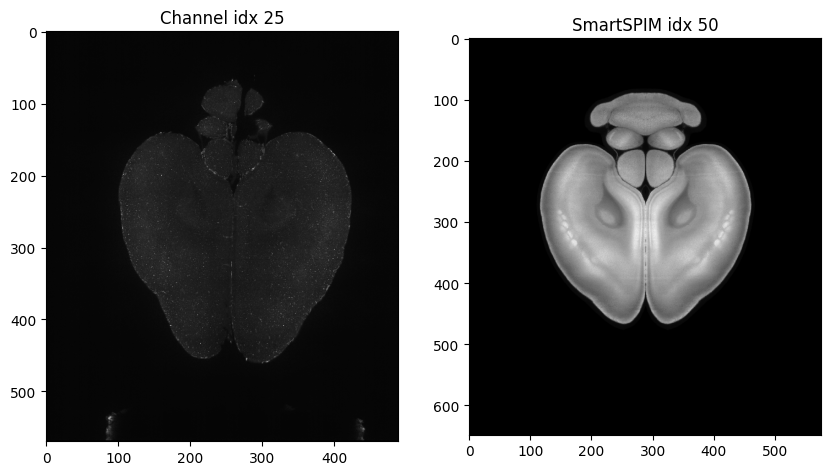

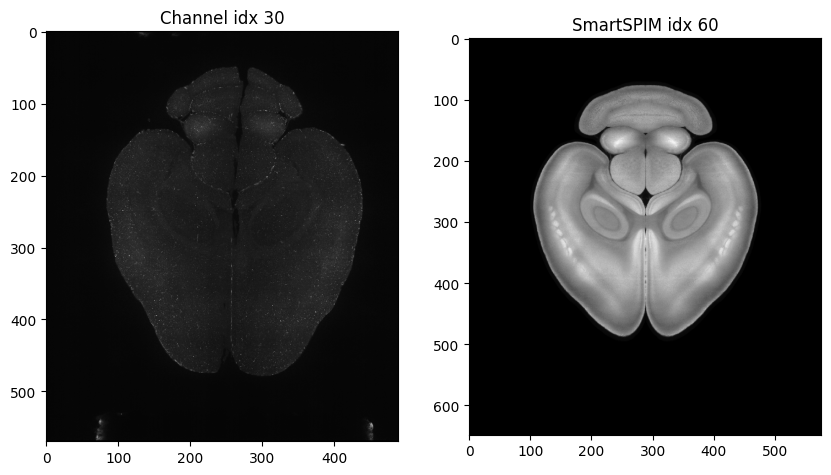

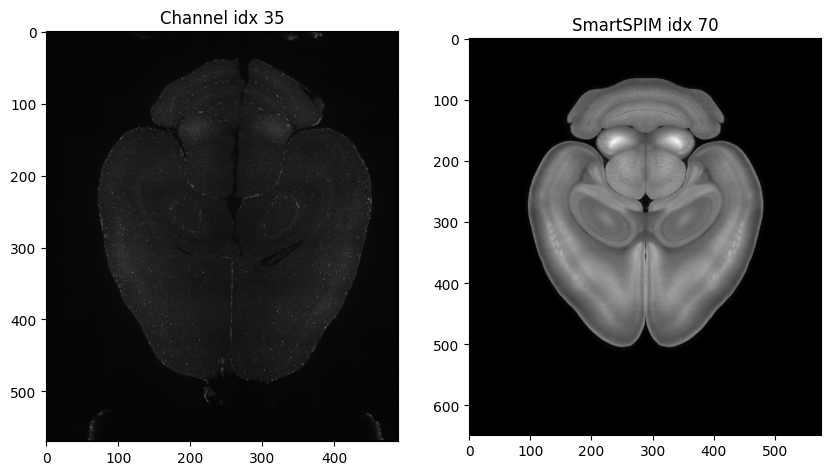

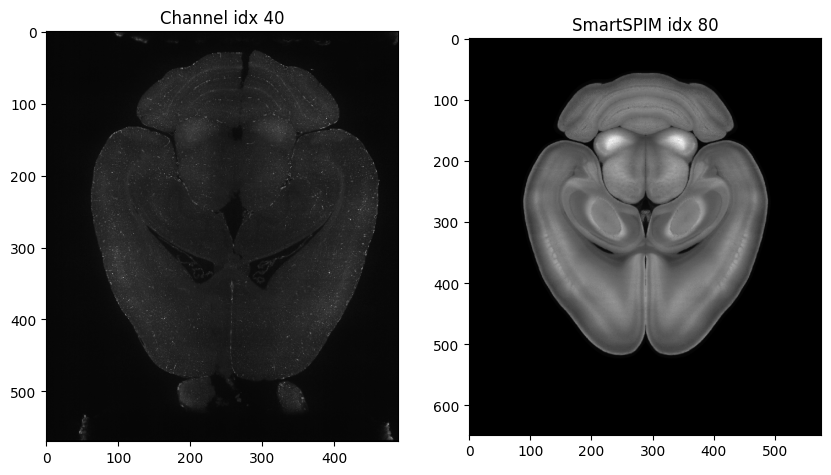

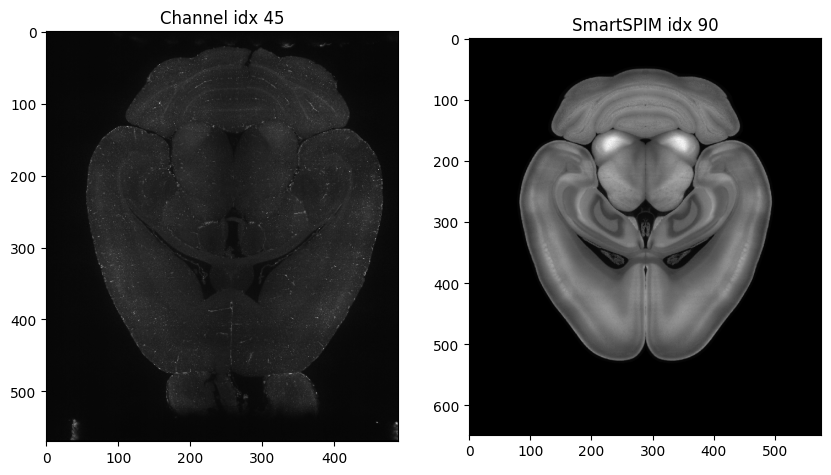

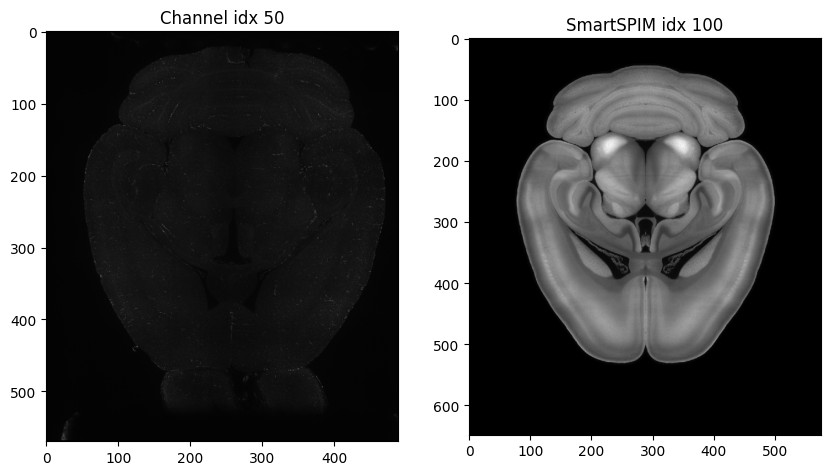

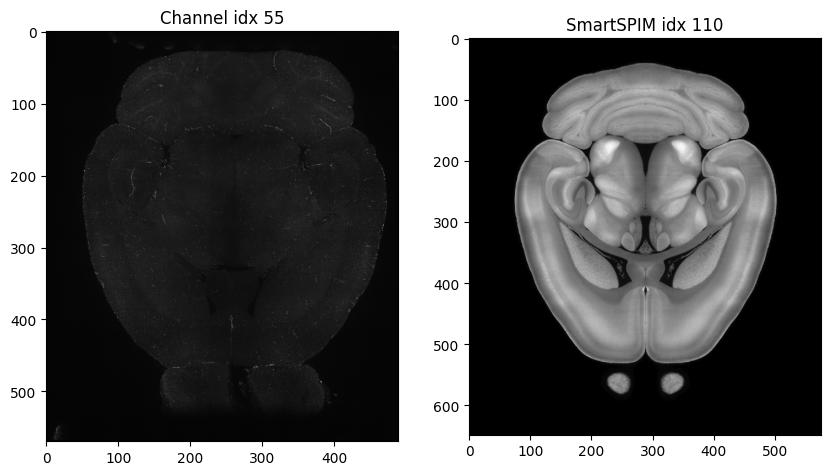

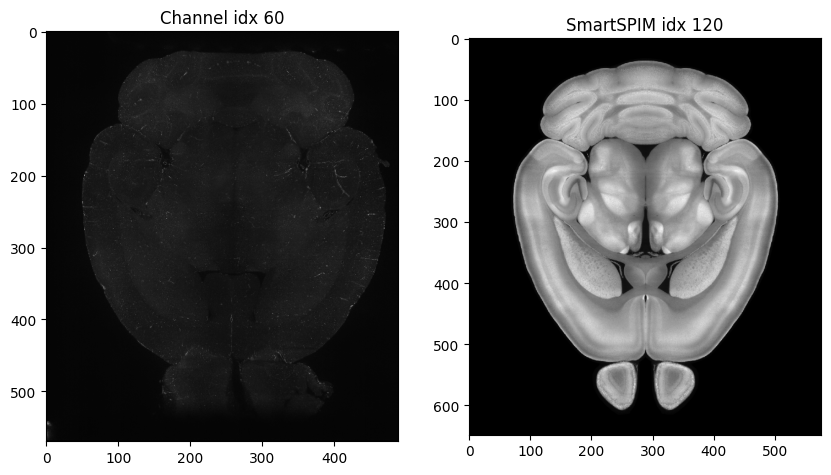

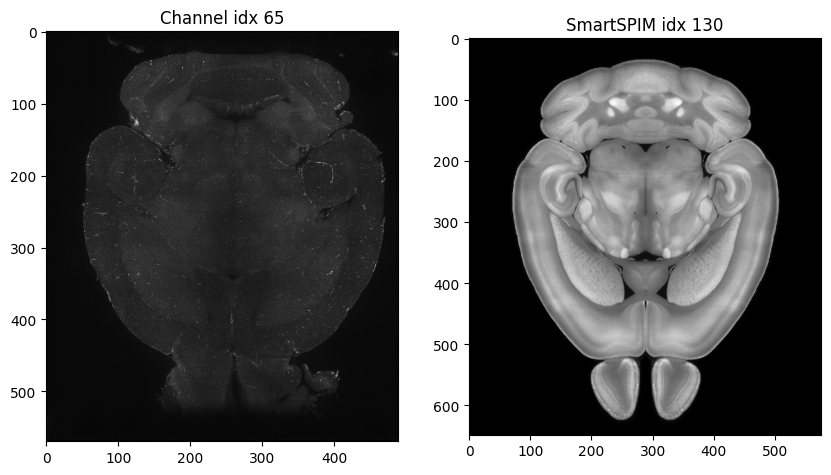

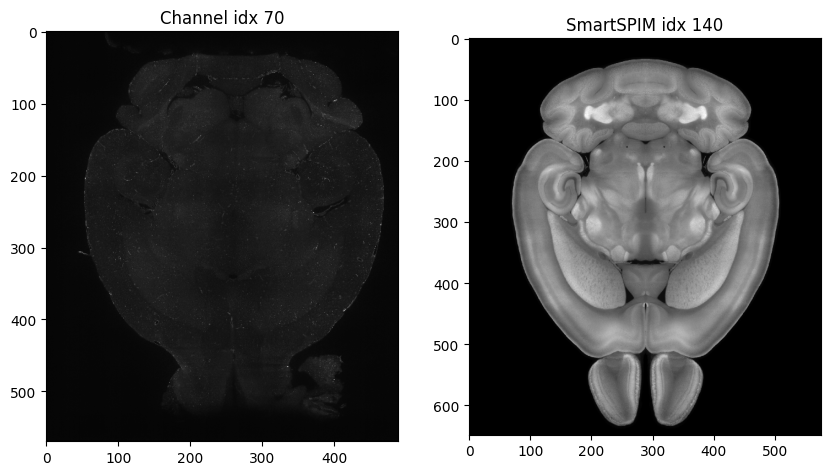

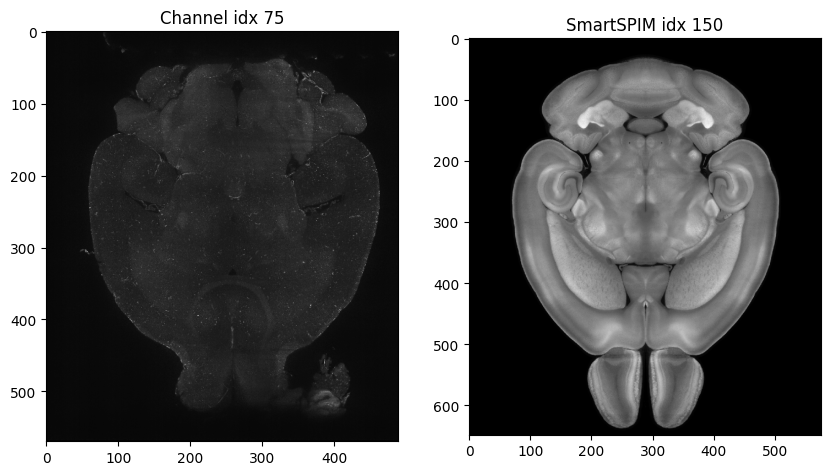

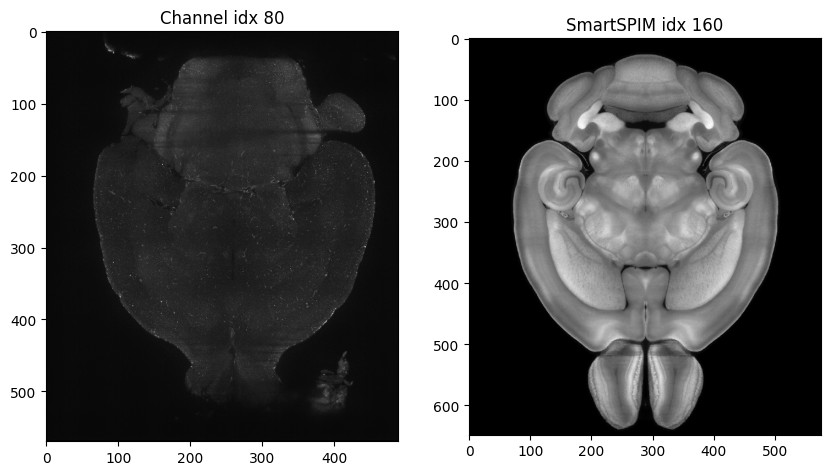

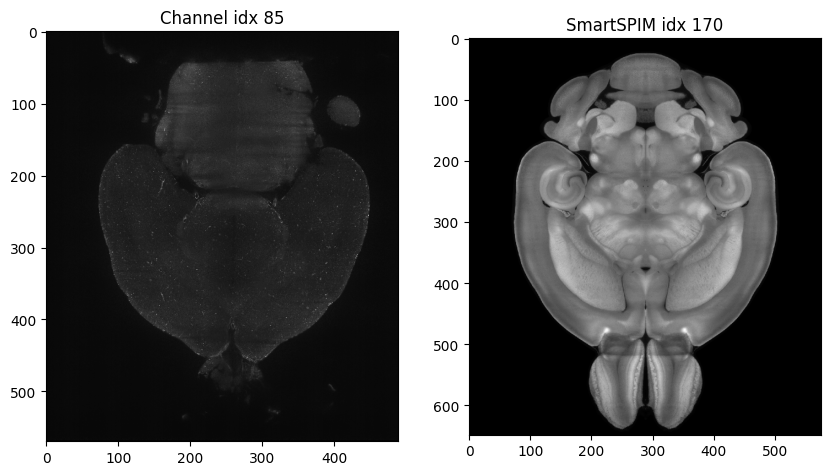

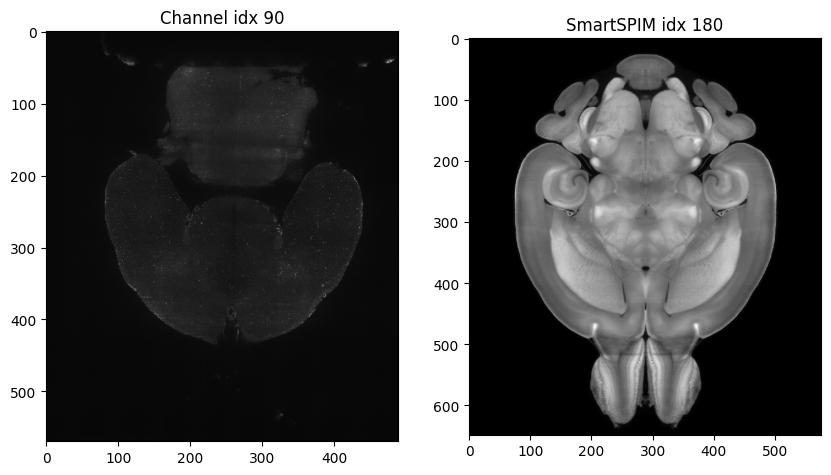

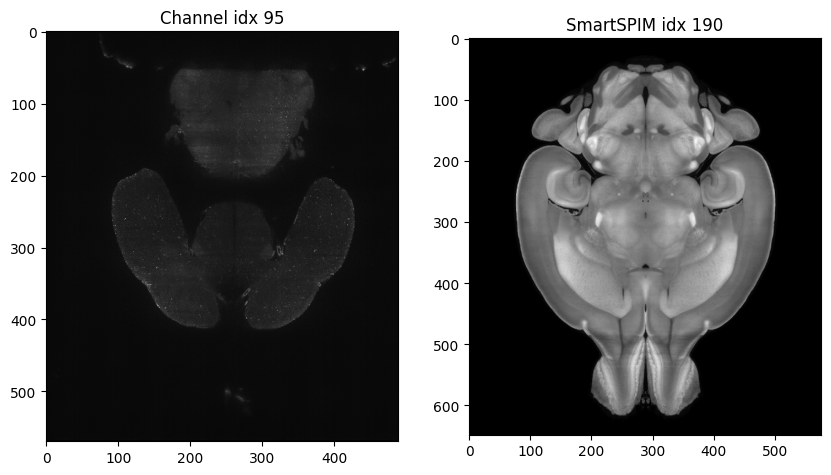

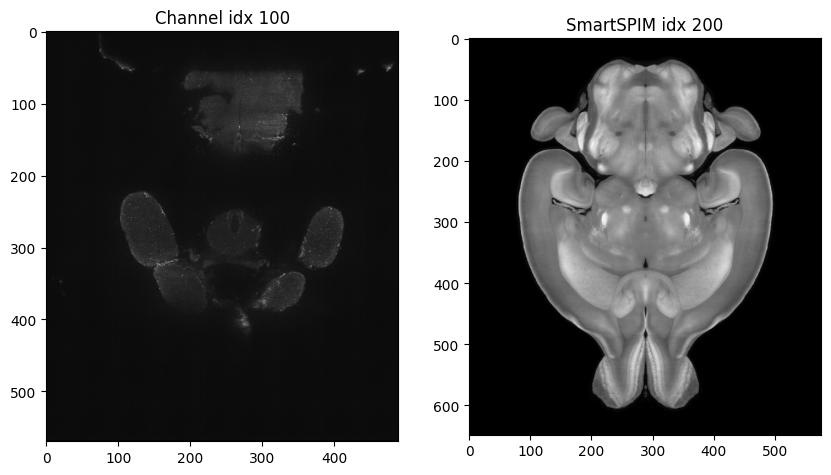

In [119]:
for i in range(0, 101, 5):
    ch_idx = i
    # Load in channels and compare
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title(f"Channel idx {ch_idx}")
    plt.imshow(curr_ch[ch_idx], cmap='gray')
    
    # Show SmartSPIM template
    smartspim_idx = ch_idx * 2
    plt.subplot(1, 2, 2)
    plt.title(f"SmartSPIM idx {smartspim_idx}")
    plt.imshow(smartspim[smartspim_idx, :, :], cmap='gray')
    plt.show()